In [1]:
# the SPOCS sample doesn't seem to be filtered?

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import numpy as np
%pylab inline

# load el-badry 2018 data
fileroot = './data/binary_metric_dataframes/'
binaries_filename = fileroot+'binary_metrics.csv'
singles_filename = fileroot+'single_metrics.csv'
binaries = pd.read_csv(binaries_filename)
singles = pd.read_csv(singles_filename)
binaries_syn = pd.read_csv(fileroot+'semi_empirical_binary_metrics_leastsq_drv26_logvbroad.csv')

# load planet host data
spocs = pd.read_csv('./data/binary_metric_dataframes/spocs_metrics.csv')
cks = pd.read_csv('./data/binary_metric_dataframes/cks_metrics.csv')

# raghavan sample
raghavan_singles = pd.read_csv('./data/binary_metric_dataframes/raghavan_single_metrics.csv')
raghavan_binaries = pd.read_csv('./data/binary_metric_dataframes/raghavan_binary_metrics.csv')

# require source ID to be integers
spocs['source_id'] = spocs['source_id'].astype(int)
cks['source_id'] = cks['source_id'].astype(int)

# remove low SNR
cks = cks.query('rvs_spec_sig_to_noise > 50')
spocs = spocs.query('rvs_spec_sig_to_noise > 50')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/isabelangelo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/isabelangelo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


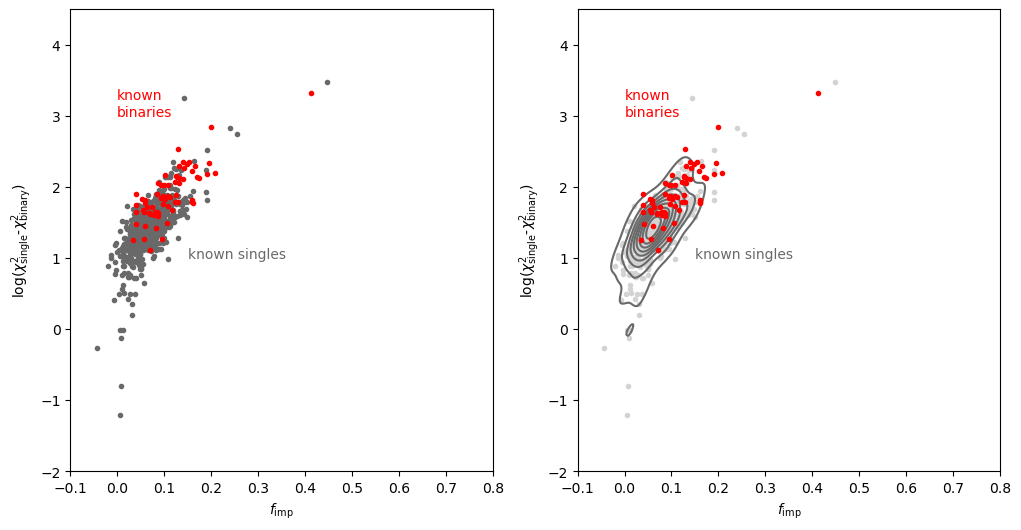

In [3]:
def label_plot():
    xlabel(r'$f_{\rm imp}$')
    ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)')
    text(0.15,1,'known singles', color='dimgrey')
    xlim(-0.1,0.8);ylim(-2,4.5)
    
def plot_single_kde(x_data, y_data):
    single_dict = {'x':x_data, 'y':y_data}
    single_sns_data = pd.DataFrame(single_dict)
    plot(x_data, y_data, '.', color='lightgrey')
    sns.kdeplot(data=single_sns_data, x="x", y="y", color='dimgrey')

figure(figsize=(12,6))
subplot(121)
plot(singles.f_imp, np.log10(singles.delta_chisq), '.', color='dimgrey')
plot(binaries.f_imp, np.log10(binaries.delta_chisq), '.', color='r')
text(0,3,'known\nbinaries', color='r')
label_plot()
subplot(122)
plot_single_kde(singles.f_imp, np.log10(singles.delta_chisq))
plot(binaries.f_imp, np.log10(binaries.delta_chisq), '.', color='r')
text(0,3,'known\nbinaries', color='r')
label_plot()

(0.0, 26.0)

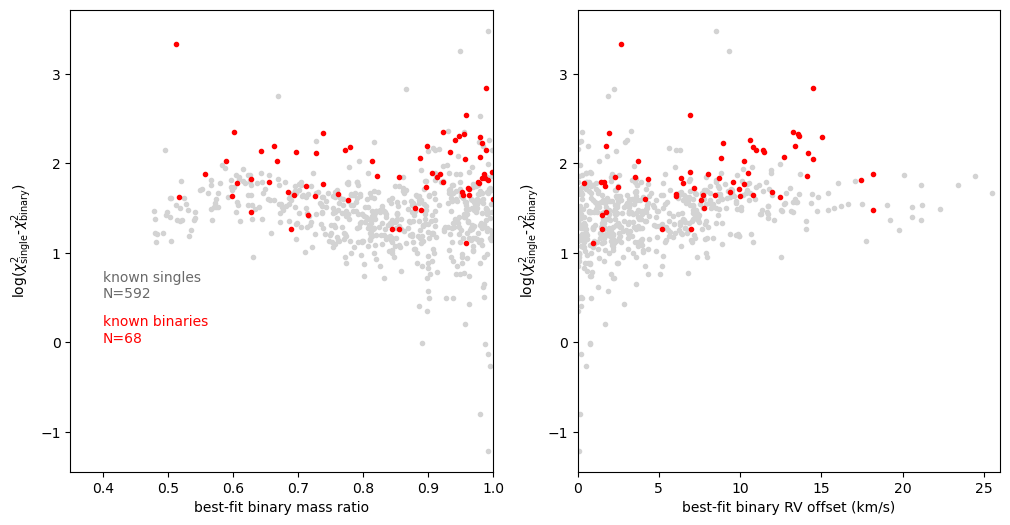

In [4]:
# same plot as above but with different x axis
figure(figsize=(12,6))
subplot(121)
plot(singles.q_cannon, np.log10(singles.delta_chisq),'.', color='lightgrey')
plot(binaries.q_cannon, np.log10(binaries.delta_chisq), '.', color='r')
ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)');xlabel('best-fit binary mass ratio')
text(0.4,0.5,'known singles\nN={}'.format(len(singles)), color='dimgrey')
text(0.4,0,'known binaries\nN={}'.format(len(binaries)), color='red')
xlim(0.35,1)

subplot(122)
plot(abs(singles.rv1_cannon - singles.rv2_cannon),
    np.log10(singles.delta_chisq),
    '.', color='lightgrey')
plot(abs(binaries.rv1_cannon - binaries.rv2_cannon),
    np.log10(binaries.delta_chisq),
    '.', color='r')
ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)');xlabel('best-fit binary RV offset (km/s)')
xlim(0,26)

/Users/isabelangelo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/isabelangelo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(3.2, 4.0)

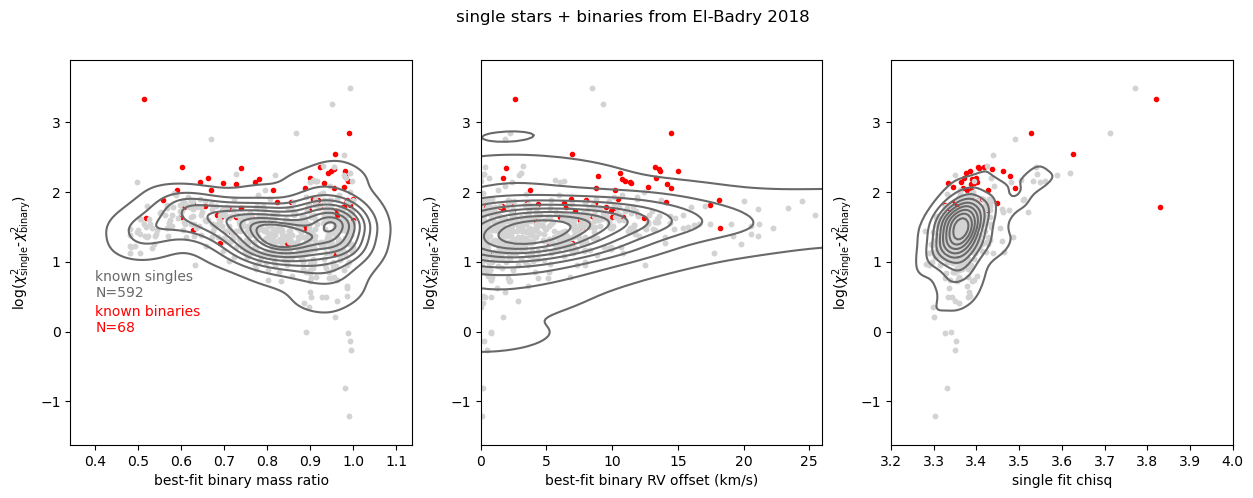

In [5]:
figure(figsize=(15,5));suptitle('single stars + binaries from El-Badry 2018')
subplot(131)
plot(singles.q_cannon, np.log10(singles.delta_chisq),'.', color='lightgrey')
plot(binaries.q_cannon, np.log10(binaries.delta_chisq), '.', color='r')
plot_single_kde(singles.q_cannon, np.log10(singles.delta_chisq))
ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)');xlabel('best-fit binary mass ratio')
text(0.4,0.5,'known singles\nN={}'.format(len(singles)), color='dimgrey')
text(0.4,0,'known binaries\nN={}'.format(len(binaries)), color='red')

subplot(132)
plot(abs(singles.rv1_cannon - singles.rv2_cannon),
    np.log10(singles.delta_chisq),
    '.', color='lightgrey')
plot(abs(binaries.rv1_cannon - binaries.rv2_cannon),
    np.log10(binaries.delta_chisq),
    '.', color='r')
plot_single_kde(abs(singles.rv1_cannon - singles.rv2_cannon),np.log10(singles.delta_chisq))
ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)');xlabel('best-fit binary RV offset (km/s)')
xlim(0,26)

subplot(133)
plot(np.log10(singles.single_fit_chisq),
    np.log10(singles.delta_chisq),
    '.', color='lightgrey')
plot(np.log10(binaries.single_fit_chisq),
    np.log10(binaries.delta_chisq),
    '.', color='r')
plot_single_kde(np.log10(singles.single_fit_chisq),np.log10(singles.delta_chisq))
ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)');xlabel('single fit chisq')
xlim(3.2,4)

/Users/isabelangelo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.4, 0, 'known binaries\nN=68')

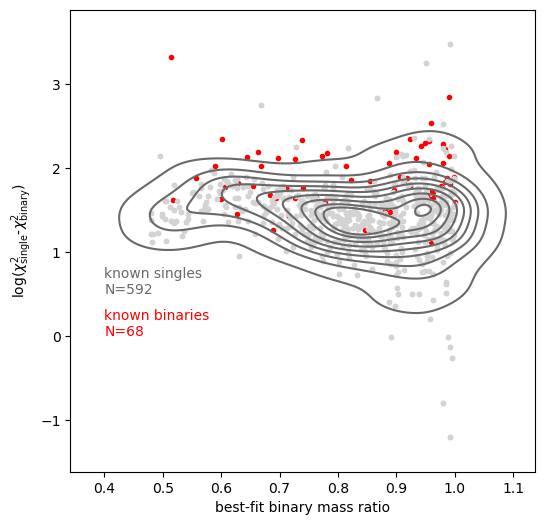

In [6]:
figure(figsize=(6,6))
plot(singles.q_cannon, np.log10(singles.delta_chisq),'.', color='lightgrey')
plot(binaries.q_cannon, np.log10(binaries.delta_chisq), '.', color='r')
plot_single_kde(singles.q_cannon, np.log10(singles.delta_chisq))
ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)');xlabel('best-fit binary mass ratio')
text(0.4,0.5,'known singles\nN={}'.format(len(singles)), color='dimgrey')
text(0.4,0,'known binaries\nN={}'.format(len(binaries)), color='red')

/Users/isabelangelo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'log($\\chi^2_{\\rm single}$-$\\chi^2_{\\rm binary}$)')

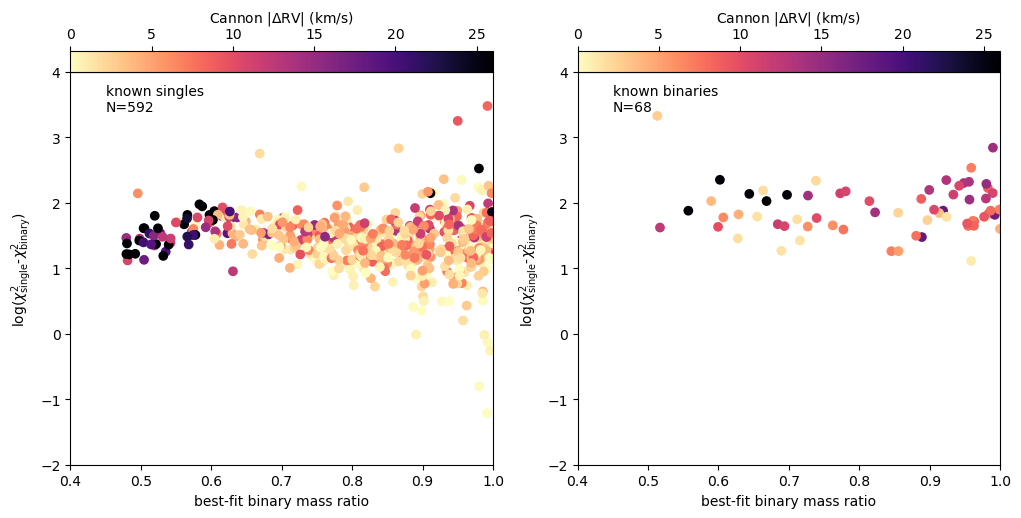

In [7]:
# same plot as above but with colors for RV offset
figure(figsize=(12,6))
subplot(121)
scatter(singles.q_cannon, np.log10(singles.delta_chisq),
        c=abs(singles.rv1_cannon-singles.rv2_cannon),
       vmin=0, vmax=26, cmap='magma_r')
text(0.45,3.4,'known singles\nN={}'.format(len(singles)))
colorbar(location='top', pad=0, label=r'Cannon |$\Delta$RV| (km/s)')
xlim(0.4,1);ylim(-2,4)
xlabel('best-fit binary mass ratio');ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)')

subplot(122)
scatter(binaries.q_cannon, np.log10(binaries.delta_chisq),
        c=abs(binaries.rv1_cannon-binaries.rv2_cannon),
       vmin=0, vmax=26, cmap='magma_r')
text(0.45,3.4,'known binaries\nN={}'.format(len(binaries)))
colorbar(location='top', pad=0, label=r'Cannon |$\Delta$RV| (km/s)')
xlim(0.4,1);ylim(-2,4)
xlabel('best-fit binary mass ratio');ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)')

In [8]:
singles.columns

Index(['Unnamed: 0', 'apogee_id', 'source_id', 'delta_chisq', 'f_imp',
       'training_density1', 'training_density2', 'q_cannon', 'rv1_cannon',
       'rv2_cannon', 'rvs_spec_sig_to_noise', 'radial_velocity_error',
       'rv_nb_transits', 'single_fit_chisq', 'single_fit_training_density',
       'single_fit_ca_resid'],
      dtype='object')

In [9]:
# compute statistics for Hirsch binaries
import glob
from astropy.io.votable import parse_single_table
import gaia_spectrum
import custom_model
rvs_files = glob.glob('./data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/*.xml')

keys = ['q_cannon','delta_chisq','f_imp','single_fit_chisq','rvs_spec_sig_to_noise']
hirsch_data = []
for file in rvs_files:
    table = parse_single_table(file)
    flux = table.array['flux'][20:-20]
    sigma = table.array['flux_error'][20:-20]
    print(file)
    spec = gaia_spectrum.GaiaSpectrum(
        None, 
        flux, 
        sigma, 
        model_to_use = custom_model.recent_model_version)
    spec.compute_binary_detection_stats()
    values = [spec.q_cannon,
              spec.delta_chisq,
              spec.f_imp,
              spec.single_fit_chisq,
               1/np.mean(sigma)]
    hirsch_data.append(dict(zip(keys, values)))
hirsch = pd.DataFrame(hirsch_data)

./data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/RVS-Gaia DR3 4418203587193988480.xml
./data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/RVS-Gaia DR3 231113736385994624.xml
./data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/RVS-Gaia DR3 2029433521248546304.xml
./data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/RVS-Gaia DR3 3712538811193759744.xml
./data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/RVS-Gaia DR3 3101923001490347392.xml
./data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/RVS-Gaia DR3 4367026303085396352.xml
./data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/RVS-Gaia DR3 1362295082910131200.xml
./data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/RVS-Gaia DR3 798068905726303232.xml
./data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/RVS-Gaia DR3 6317854874752594048.xml
./data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/RVS-Gaia DR3 19316224572460416.xml
./data/literature_data/Hirsch2021/hirsch_2021_rvs_spec

Text(0.0, 3.5, 'binaries from Hirsch 2021, N=15')

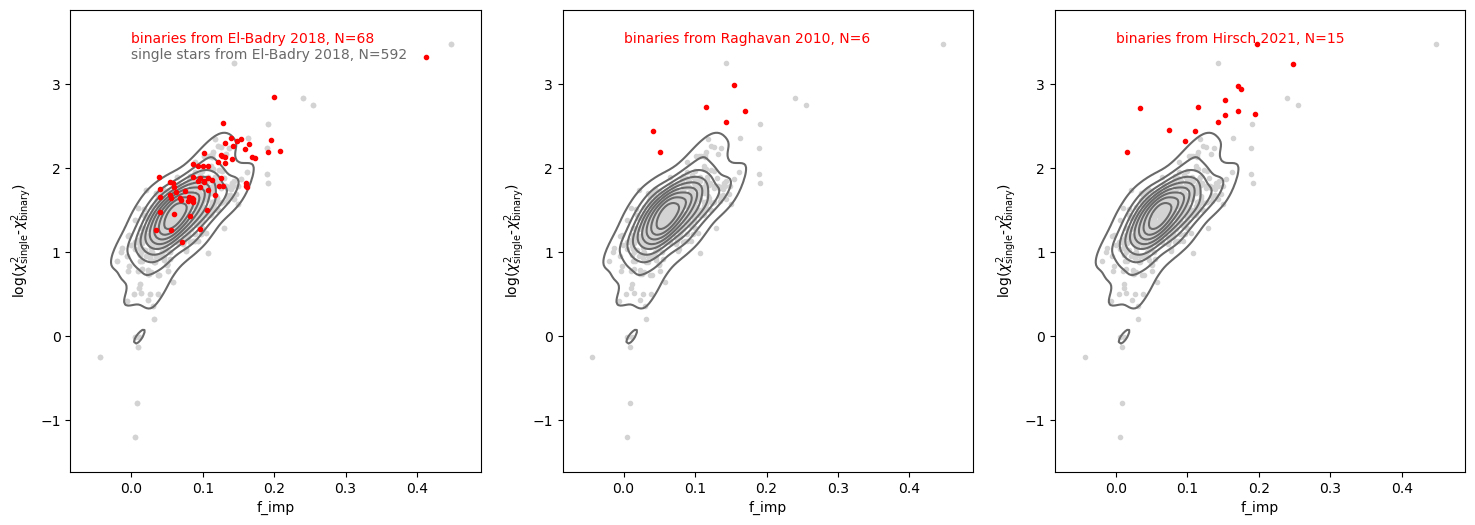

In [10]:
figure(figsize=(18,6))

subplot(131)
plot(singles.f_imp,np.log10(singles.delta_chisq), '.', 
     color='lightgrey')
plot_single_kde(singles.f_imp,np.log10(singles.delta_chisq))
plot(binaries.f_imp, np.log10(binaries.delta_chisq), '.', 
     color='r')
xlabel('f_imp');ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)')
text(0.0,3.5,'binaries from El-Badry 2018, N={}'.format(len(binaries)), color='r')
text(0.0,3.3,'single stars from El-Badry 2018, N={}'.format(len(singles)), color='dimgrey')

subplot(132)
plot_single_kde(singles.f_imp,np.log10(singles.delta_chisq))
plot(raghavan_binaries.f_imp, 
     np.log10(raghavan_binaries.delta_chisq), '.', 
     color='r')
xlabel('f_imp');ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)')
text(0.0,3.5,'binaries from Raghavan 2010, N={}'.format(len(raghavan_binaries)), color='r')

subplot(133)
plot_single_kde(singles.f_imp,np.log10(singles.delta_chisq))
plot(hirsch.f_imp, 
     np.log10(hirsch.delta_chisq), '.', 
     color='r')
xlabel('f_imp');ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)')
text(0.0,3.5,'binaries from Hirsch 2021, N={}'.format(len(hirsch.delta_chisq)), color='r')

Text(0.4, -0.8, 'binaries from Hirsch 2021, N=15')

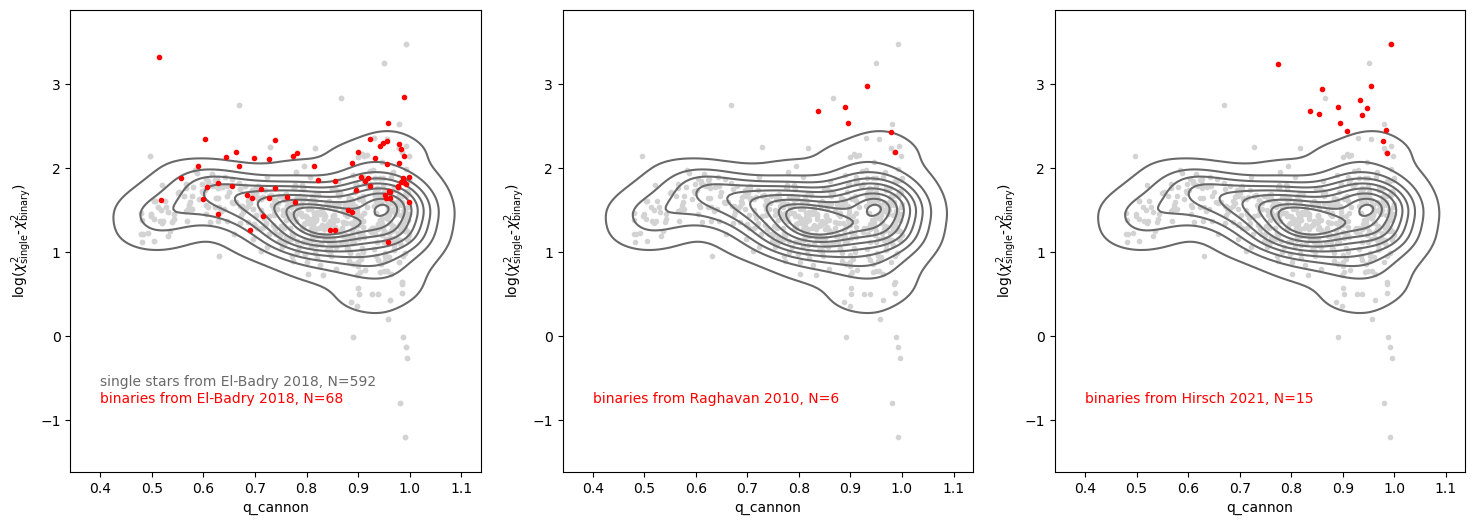

In [11]:
figure(figsize=(18,6))

subplot(131)
plot(singles.q_cannon,np.log10(singles.delta_chisq), '.', 
     color='lightgrey')
plot_single_kde(singles.q_cannon,np.log10(singles.delta_chisq))
plot(binaries.q_cannon, np.log10(binaries.delta_chisq), '.', 
     color='r')
xlabel('q_cannon');ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)')
text(0.4,-0.8,'binaries from El-Badry 2018, N={}'.format(len(binaries)), color='r')
text(0.4,-0.6,'single stars from El-Badry 2018, N={}'.format(len(singles)), color='dimgrey')

subplot(132)
plot_single_kde(singles.q_cannon,np.log10(singles.delta_chisq))
plot(raghavan_binaries.q_cannon, 
     np.log10(raghavan_binaries.delta_chisq), '.', 
     color='r')
xlabel('q_cannon');ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)')
text(0.4,-0.8,'binaries from Raghavan 2010, N={}'.format(len(raghavan_binaries)), color='r')

subplot(133)
plot_single_kde(singles.q_cannon,np.log10(singles.delta_chisq))
plot(hirsch.q_cannon, 
     np.log10(hirsch.delta_chisq), '.', 
     color='r')
xlabel('q_cannon');ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)')
text(0.4,-0.8,'binaries from Hirsch 2021, N={}'.format(len(hirsch.delta_chisq)), color='r')

Text(3.4, 3.5, 'binaries from Hirsch 2021, N=15')

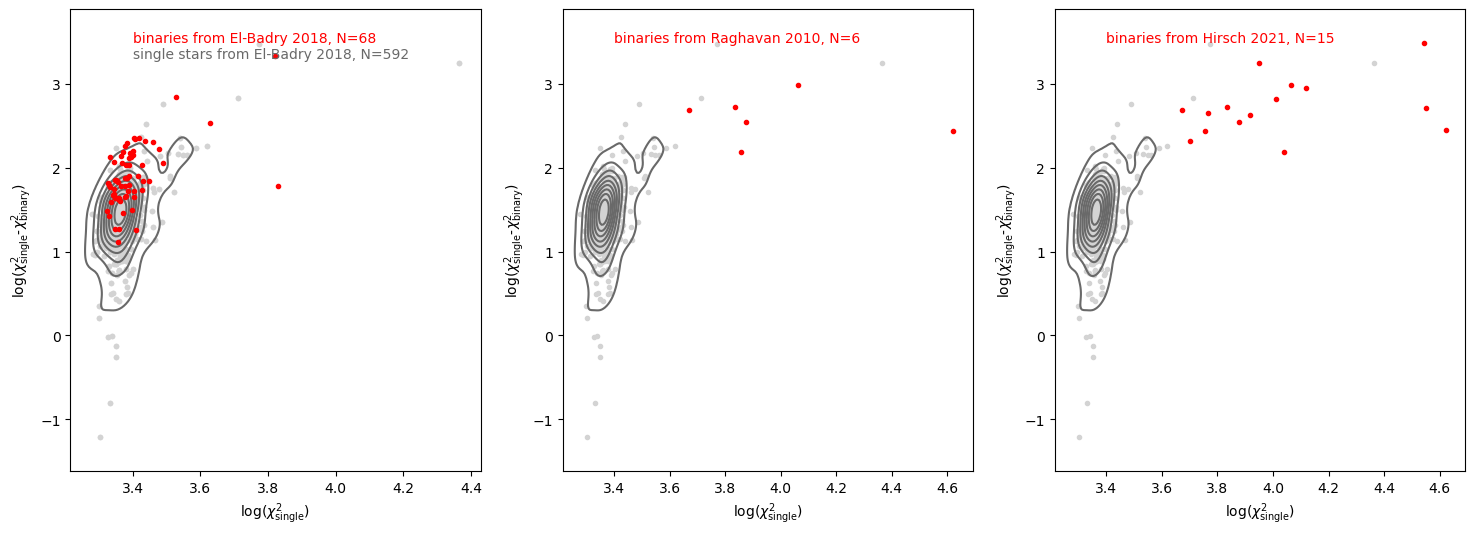

In [12]:
# same but with single fit chisq
figure(figsize=(18,6))

subplot(131)
plot(np.log10(singles.single_fit_chisq), np.log10(singles.delta_chisq), '.', 
     color='lightgrey')
plot_single_kde(np.log10(singles.single_fit_chisq), np.log10(singles.delta_chisq))
plot(np.log10(binaries.single_fit_chisq), np.log10(binaries.delta_chisq), '.', 
     color='r')
xlabel(r'log($\chi^2_{\rm single})$');ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)')
text(3.4,3.5,'binaries from El-Badry 2018, N={}'.format(len(binaries)), color='r')
text(3.4,3.3,'single stars from El-Badry 2018, N={}'.format(len(singles)), color='dimgrey')

subplot(132)
plot_single_kde(np.log10(singles.single_fit_chisq),np.log10(singles.delta_chisq))
plot(np.log10(raghavan_binaries.single_fit_chisq), 
     np.log10(raghavan_binaries.delta_chisq), '.', 
     color='r')
xlabel(r'log($\chi^2_{\rm single})$');ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)')
text(3.4,3.5,'binaries from Raghavan 2010, N={}'.format(len(raghavan_binaries)), color='r')

subplot(133)
plot_single_kde(np.log10(singles.single_fit_chisq), np.log10(singles.delta_chisq))
plot(np.log10(hirsch.single_fit_chisq), 
     np.log10(hirsch.delta_chisq), '.', 
     color='r')
xlabel(r'log($\chi^2_{\rm single})$');ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)')
text(3.4,3.5,'binaries from Hirsch 2021, N={}'.format(len(hirsch.delta_chisq)), color='r')

Text(0.4, -0.8, 'binaries from Hirsch 2021, N=15')

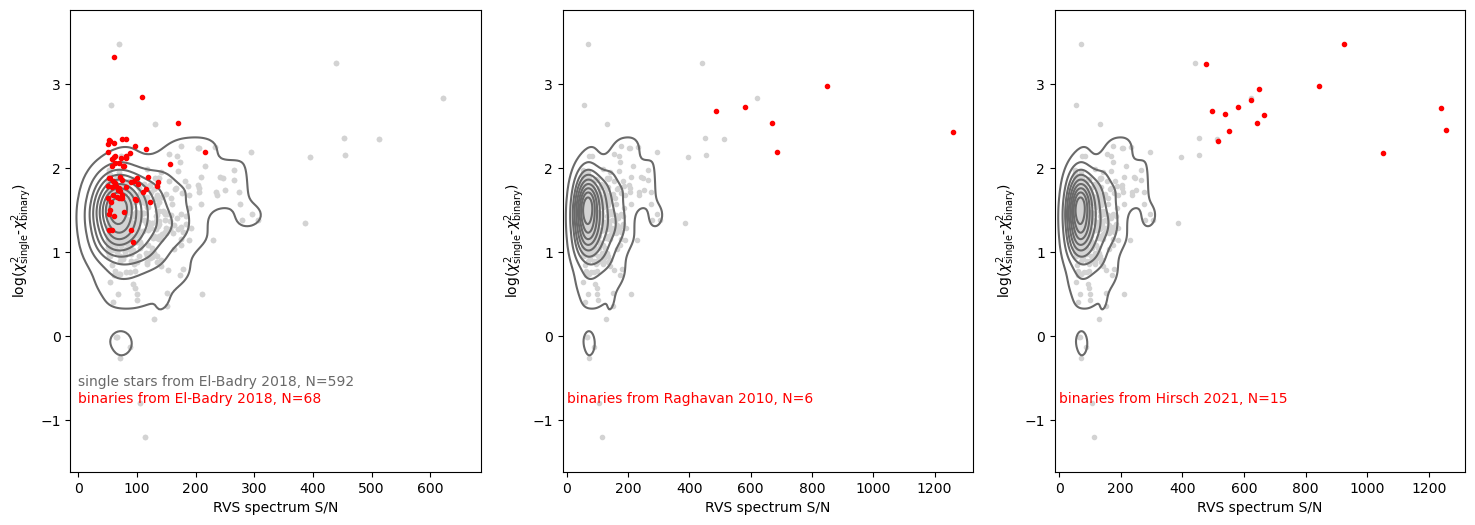

In [13]:
figure(figsize=(18,6))

subplot(131)
plot(singles.rvs_spec_sig_to_noise,np.log10(singles.delta_chisq), '.', 
     color='lightgrey')
plot_single_kde(singles.rvs_spec_sig_to_noise,np.log10(singles.delta_chisq))
plot(binaries.rvs_spec_sig_to_noise, np.log10(binaries.delta_chisq), '.', 
     color='r')
xlabel('RVS spectrum S/N');ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)')
text(0.4,-0.8,'binaries from El-Badry 2018, N={}'.format(len(binaries)), color='r')
text(0.4,-0.6,'single stars from El-Badry 2018, N={}'.format(len(singles)), color='dimgrey')

subplot(132)
plot_single_kde(singles.rvs_spec_sig_to_noise,np.log10(singles.delta_chisq))
plot(raghavan_binaries.rvs_spec_sig_to_noise, 
     np.log10(raghavan_binaries.delta_chisq), '.', 
     color='r')
xlabel('RVS spectrum S/N');ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)')
text(0.4,-0.8,'binaries from Raghavan 2010, N={}'.format(len(raghavan_binaries)), color='r')

subplot(133)
plot_single_kde(singles.rvs_spec_sig_to_noise,np.log10(singles.delta_chisq))
plot(hirsch.rvs_spec_sig_to_noise, 
     np.log10(hirsch.delta_chisq), '.', 
     color='r')
xlabel('RVS spectrum S/N');ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)')
text(0.4,-0.8,'binaries from Hirsch 2021, N={}'.format(len(hirsch.delta_chisq)), color='r')

Text(0.4, 3.5, 'SPOCS sample, N=80')

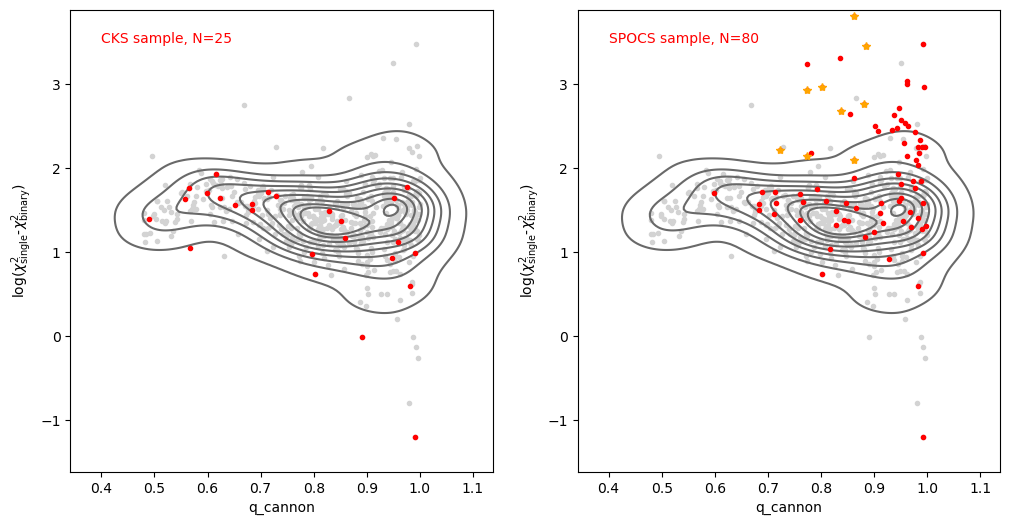

In [14]:
import numpy as np
figure(figsize=(12,6))

subplot(121)
plot_single_kde(singles.q_cannon,np.log10(singles.delta_chisq))
plot(cks.q_cannon, 
     np.log10(cks.delta_chisq), '.', 
     color='r')
xlabel('q_cannon');ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)')
cks_binaries = cks.query('q_cannon<=0.9 & delta_chisq>10**2')
cks_binaries = cks_binaries.query('training_density1>1e-6 & training_density2>1e-6 & \
radial_velocity_error<1')
plot(cks_binaries.q_cannon, 
     np.log10(cks_binaries.delta_chisq), '*', 
     color='orange')
text(0.4,3.5,'CKS sample, N={}'.format(len(cks)), color='r')

subplot(122)
plot_single_kde(singles.q_cannon,np.log10(singles.delta_chisq))
plot(spocs.q_cannon, 
     np.log10(spocs.delta_chisq), '.', 
     color='r')
xlabel('q_cannon');ylabel(r'log($\chi^2_{\rm single}$-$\chi^2_{\rm binary}$)')
spocs_binaries = spocs.query('q_cannon<=0.9 & delta_chisq>10**2')
spocs_binaries = spocs_binaries.query('training_density1>1e-6 & training_density2>1e-6 & \
radial_velocity_error<1')
plot(spocs_binaries.q_cannon, 
     np.log10(spocs_binaries.delta_chisq), '*', 
     color='orange')
text(0.4,3.5,'SPOCS sample, N={}'.format(len(spocs)), color='r')

In [15]:
# are these SPOCS stars binaries, or single stars
# where can I check this?
spocs_binaries
# I need to add filters based on radial_velocity_error
# I think none of them have dRV>26

# HD 9562: couldn't find any information
# HD 132142: I think Lea observed this one but I don't see it in the paper
# HD 182572: again Lead observed this but I don't see it in the paper
# HII 296 : I couldn't find information on this.
# HD 25311 : I couldn't find information on this.

# KIC 10454113 has RUWE=6
# HD 112758 has RUWE = 15 and non_single_star=3 and a companion reported in Hirsch 2021
# HD 104304: I think this one has an RV-detected companion at P=300 years on jump!


,Unnamed: 0,target_id,source_id,delta_chisq,f_imp,training_density1,training_density2,q_cannon,rv1_cannon,rv2_cannon,rvs_spec_sig_to_noise,radial_velocity_error,rv_nb_transits,single_fit_chisq,single_fit_training_density,single_fit_ca_resid
2,2,HD 9562,2477891500647336704,931.688703,0.099992,0.000200,0.000091,0.802048,0.001022,-0.187640,869.38080,0.122610,16,22585.986440,0.000783,4442.524477
15,15,HD 104304,3575733210781078016,2835.911048,0.124028,0.000257,0.000012,0.883877,2.224791,-2.872267,1111.55680,0.121801,23,55021.398006,0.000315,42182.910640
18,18,HD 132142,1606148310770764288,848.883633,0.282612,0.000278,0.000058,0.773454,-0.507841,1.786844,618.84490,0.121648,37,6388.853995,0.000247,1755.604102
25,25,HD 182572,4315804351350378496,6485.977925,0.180775,0.000123,0.000009,0.861628,1.924289,-3.112263,1401.76600,0.118311,29,106382.802222,0.000191,35157.476267
28,28,HD 202917,6463782435948431616,576.816873,0.178849,0.000933,0.000382,0.880952,-3.713578,6.516752,277.95535,0.225201,17,3822.522529,0.000386,71139.492548
34,34,KIC 10454113,2131620306552653312,163.429919,0.111118,0.002418,0.000005,0.723515,-0.091611,1.888569,248.99562,0.198209,17,2691.971093,0.002324,451.620191
53,53,HII 296,65072435323295872,140.127121,0.127004,0.000867,0.000035,0.772768,-1.899802,9.501111,62.46514,0.805534,16,2524.325578,0.000208,4743.825063
54,54,HD 25311,38878563657131776,125.017443,0.092951,0.001004,0.000660,0.862976,0.001699,0.003386,299.14070,0.139012,18,2892.967280,0.002072,1737.013535
61,61,HD 112758,3626268998574790656,485.153123,0.170180,0.000007,0.000002,0.837033,0.146291,0.069518,485.81964,0.412284,17,4688.168088,0.000164,5258.616643


In [16]:
# maybe it's time to send Megan an update
# and then I can go from there
# I really need to know if this is a good way to find binaries
# and how to check the ones I'm finding on SIMBAD/exoFOP

In [17]:
# are the single stars that look like binaries in the El-Badry sample 
# just high SNR?
# these are the binaries in El-Badry 2018 singles
# are these the same high SNR stars? they have SNR=60-600
# am I calculating SNR incorrectly? or chisq?
# I guess I could check that in the next 20 minutes...
# does my code just find that high SNR stars are binaries?
singles.query('q_cannon<=0.9 & delta_chisq>10**2')

,Unnamed: 0,apogee_id,source_id,delta_chisq,f_imp,training_density1,training_density2,q_cannon,rv1_cannon,rv2_cannon,rvs_spec_sig_to_noise,radial_velocity_error,rv_nb_transits,single_fit_chisq,single_fit_training_density,single_fit_ca_resid
30,30,2M13323094+3602069,1471958448518765696,683.303125,0.239958,2.688057e-04,6.311428e-06,0.866028,-0.705599,1.558497,622.25024,0.122609,54,5153.613373,3.938090e-04,5462.381087
89,89,2M08105670+7738320,1137679322804863872,137.336313,0.113129,4.099962e-04,2.664842e-04,0.899737,1.026286,-1.356134,395.58078,0.134076,24,3029.807678,7.561771e-04,912.614588
109,109,2M19475121+4436517,2078963187175313920,567.941638,0.254624,2.357159e-04,1.055863e-07,0.668859,-0.792800,1.063499,56.15344,0.309207,16,3088.918256,1.000007e-07,431.228248
198,198,2M00505932+8438080,573355254727667456,178.288368,0.126137,1.559919e-04,1.031074e-04,0.728188,0.226126,0.000001,233.86815,0.242242,16,3489.498172,4.836781e-04,1271.026533
416,416,2M18423723-3012237,4047216784791102208,139.949399,0.108256,1.000002e-07,4.151914e-05,0.495834,-1.433337,4.616844,82.75105,0.354015,7,3539.871128,1.000123e-07,2448.614836
527,527,2M13471762+1903246,1248169899114517504,105.968195,0.112031,1.087180e-03,1.385909e-04,0.794318,-0.955703,0.360388,216.09007,0.165020,16,2295.848741,2.167998e-03,1346.511849
558,558,2M13272568-0104102,3638735158331103488,173.306594,0.189597,1.162555e-03,3.720869e-04,0.817174,2.385433,-0.535637,206.15770,0.183292,23,2239.248338,1.859665e-03,904.031045
